In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re

%matplotlib inline
sns.set()

In [2]:
# Reading in the csv file
csv_file = pd.read_csv('twitter-archive-enhanced.csv')
csv_file.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

In [3]:
# Using requests to access the tsv file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file = requests.get(url)

open('image_predictions.tsv', 'wb').write(file.content)

335079

In [4]:
file.text

"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/m

In [5]:
# Reading in the tsv file

tsv_file = pd.read_csv('image_predictions.tsv', encoding='utf-8', sep="\t")
tsv_file.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [6]:
# Authenticating with the API Access.
consumer_key = 'VD4NQ2P1fEEigSIBVb******'
consumer_secret = '793zVT0jNUsytcRr6gdcn8W3oN1l8kq86jFdvVUYQ9xM*******'
access_token = '1099640386534993920-ovoiMKrHVpO4KgLVGKABjCDeHa******'
access_secret = 'OA2pGcTVVgjydSrl61DeWrdGwNsB1ym6lt5gOKHM******'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
# Fetching the tweet data
tweets = []
ids_with_no_tweet = []

for each in csv_file['tweet_id']:
    try:
        tweets.append(api.get_status(each))
    except:
        ids_with_no_tweet.append(each)

print("There are {} tweets available and {} tweet ids were not accessible".format(len(tweets), len(ids_with_no_tweet)))

There are 2326 tweets available and 30 tweet ids were not accessible


In [8]:
tweets

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},
      'large': {'w': 540, 'h': 528, 

In [9]:
# Writing the tweets into a json file
with open('tweet_json.txt', 'w') as f:
    f.write(json.dumps(tweets, sort_keys=True, indent=4))

In [10]:
# reading the tweet_json.txt file into a df

df_list = []
with open('tweet_json.txt', encoding='utf-8') as file:
    tweets = json.load(file)
    
    for each in tweets:
        tweet_id = each['id']
        text = each['text']
        url = text[text.find('https'):]
        retweet_count = each['retweet_count']
        favorite_count = each['favorite_count']
        retweeted = each['retweeted_status'] = each.get('retweeted_status', 'Original tweet')
        if retweeted == 'Original tweet':
            url = url
        else:
            retweeted = 'This is a retweet'
            url = 'retweet'
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': tweet_id,'url': url, 'retweet_count':retweet_count,
                        'retweeted':retweeted, 'favorite_count': favorite_count})
json_file = pd.DataFrame(df_list, columns = ['tweet_id', 'url', 'retweet_count', 'retweeted', 'favorite_count'])

json_file.head()

tweet_id                      url  retweet_count       retweeted  \
0  892420643555336193  https://t.co/MgUWQ76dJU           7057  Original tweet   
1  892177421306343426  https://t.co/aQFSeaCu9L           5333  Original tweet   
2  891815181378084864  https://t.co/r0YlrsGCgy           3506  Original tweet   
3  891689557279858688  https://t.co/tD36da7qLQ           7263  Original tweet   
4  891327558926688256  https://t.co/0g0KMIVXZ3           7806  Original tweet   

   favorite_count  
0           34048  
1           29532  
2           22243  
3           37199  
4           35554

# Accessing the data for quality and tidiness

In [11]:
# Acessing csv_file
csv_file

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [12]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
csv_file.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [14]:
csv_file.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [15]:
csv_file[csv_file.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [16]:
csv_file['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
# Acessing tsv_file
tsv_file

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [18]:
tsv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tsv_file.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [20]:
tsv_file.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [21]:
tsv_file[tsv_file.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [22]:
# Acessing json_file
json_file

tweet_id                      url  retweet_count  \
0     892420643555336193  https://t.co/MgUWQ76dJU           7057   
1     892177421306343426  https://t.co/aQFSeaCu9L           5333   
2     891815181378084864  https://t.co/r0YlrsGCgy           3506   
3     891689557279858688  https://t.co/tD36da7qLQ           7263   
4     891327558926688256  https://t.co/0g0KMIVXZ3           7806   
...                  ...                      ...            ...   
2321  666049248165822465  https://t.co/4B7cOc1EDq             37   
2322  666044226329800704  https://t.co/DWnyCjf2mx            116   
2323  666033412701032449  https://t.co/y671yMhoiR             36   
2324  666029285002620928  https://t.co/r7mOb2m0UI             39   
2325  666020888022790149  https://t.co/BLDqew2Ijj            424   

           retweeted  favorite_count  
0     Original tweet           34048  
1     Original tweet           29532  
2     Original tweet           22243  
3     Original tweet           37199  
4     Original tweet           35554  
...              ...             ...  
2321  Original tweet              89  
2322  Original tweet             247  
2323  Original tweet             100  
2324  Original tweet             112  
2325  Original tweet            2306  

[2326 rows x 5 columns]

In [23]:
json_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   int64 
 1   url             2326 non-null   object
 2   retweet_count   2326 non-null   int64 
 3   retweeted       2326 non-null   object
 4   favorite_count  2326 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 91.0+ KB


In [24]:
json_file.describe()

tweet_id  retweet_count  favorite_count
count  2.326000e+03    2326.000000     2326.000000
mean   7.417326e+17    2484.046432     7086.517197
std    6.816035e+16    4210.386181    11016.339159
min    6.660209e+17       1.000000        0.000000
25%    6.780814e+17     498.250000     1229.250000
50%    7.178159e+17    1155.500000     3064.500000
75%    7.986402e+17    2878.750000     8648.250000
max    8.924206e+17   71201.000000   145629.000000

In [25]:
json_file.nunique()

tweet_id          2326
url               2131
retweet_count     1638
retweeted            2
favorite_count    1966
dtype: int64

In [26]:
json_file[json_file.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, url, retweet_count, retweeted, favorite_count]
Index: []

## Data Quality and Tidiness Issues

- Visually Scanning through the twitter-archived-enhanced, I noticed that some rows had values that were not assigned to particular columns. (Tidiness issue)
- Using Excel, the Json file cannot be visually scanned. Viewing the Json file programmatically as a dataframe, There was no quality issues seen.
- Tweet_id column in all the dataframes are wrongly typed to integers instead of objects (Quality issue)
- Somes rows in twitter-archived-enhanced has single characters for the name column and some None (Quality issue)
- Column "in_reply_to_status_id" in twitter-archived-enhanced have many null values. (Tidiness issue)
- Column "in_reply_to_user_id" in twitter-archived-enhanced have many null values. (Tidiness issue)
- Column "retweeted_status_id" in twitter-archived-enhanced have many null values. (Tidiness issue)
- Column "retweeted_status_user_id" in twitter-archived-enhanced have many null values. (Tidiness issue)
- Column "retweeted_status_user_timestamp" in twitter-archived-enhanced have many null values. (Tidiness issue)
-- Keeping these columns may bring in some bias to the analysis
- Column "timestamp" is wrongly typed (Quality issue)
- Create new column called rating from rating_numerator and rating_denominator (Quality issue)
- Create new column dog_type from text (Quality issue)
- Create new column dog_breed from image prediction data (Quality issue)
- Some text values have more than one dog_type in it (Quality issue)
- The data has retweeted tweets which are not useful for this analysis (Quality issue)
- Merge all available datasets to improve quality (Quality issue)

## Data Cleaning

Creating copies of each df

In [27]:
csv_clean = csv_file.copy()
tsv_clean = tsv_file.copy()
json_clean = json_file.copy()

Define 1 : For all dataframes, convert the tweet_id column to string objects using astype (Quality issue)

In [28]:
# Code 1

csv_clean['tweet_id'] = csv_clean['tweet_id'].astype(str)
tsv_clean['tweet_id'] = tsv_clean['tweet_id'].astype(str)
json_clean['tweet_id'] = json_clean['tweet_id'].astype(str)

In [29]:
# Test 1

print(csv_clean['tweet_id'].dtype)
print(tsv_clean['tweet_id'].dtype)
print(json_clean['tweet_id'].dtype)

object
object
object


Define 2: For csv_clean dataframe, convert the timestamp column to a datetime using pd.to_datetime (Quality issue)

In [30]:
# Code 2

csv_clean['timestamp'] = csv_clean['timestamp'].str.slice(start=0, stop=-6)
csv_clean['timestamp'] = pd.to_datetime(csv_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [31]:
# Test 2

print(csv_clean['timestamp'].dtype)

datetime64[ns]


Define 3: Merge all clean dataframes (Tidiness issues)

In [32]:
# Code 3

master_df = pd.concat([csv_clean, tsv_clean, json_clean], join='outer', axis=1)


# Test 3

master_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...   p2_conf  p2_dog  \
0  https://twitter.com/dog_rates/status/892420643...  ...  0.156665    True   
1  https://twitter.com/dog_rates/status/892177421...  ...  0.074192    True   
2  https://twitter.com/dog_rates/status/891815181...  ...  0.138584    True   
3  https://twitter.com/dog_rates/status/891689557...  ...  0.360687    True   
4  https://twitter.com/dog_rates/status/891327558...  ...  0.243682    True   

                    p3   p3_conf p3_dog            tweet_id  \
0    Shetland_sheepdog  0.061428   True  892420643555336193   
1  Rhodesian_ridgeback  0.072010   True  892177421306343426   
2           bloodhound  0.116197   True  891815181378084864   
3   miniature_pinscher  0.222752   True  891689557279858688   
4             Doberman  0.154629   True  891327558926688256   

                       url retweet_count       retweeted  favorite_count  
0  https://t.co/MgUWQ76dJU        7057.0  Original tweet         34048.0  
1  https://t.co/aQFSeaCu9L        5333.0  Original tweet         29532.0  
2  https://t.co/r0YlrsGCgy        3506.0  Original tweet         22243.0  
3  https://t.co/tD36da7qLQ        7263.0  Original tweet         37199.0  
4  https://t.co/0g0KMIVXZ3        7806.0  Original tweet         35554.0  

[5 rows x 34 columns]

In [33]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [34]:
master_df.describe()

in_reply_to_status_id  in_reply_to_user_id  retweeted_status_id  \
count           7.800000e+01         7.800000e+01         1.810000e+02   
mean            7.455079e+17         2.014171e+16         7.720400e+17   
std             7.582492e+16         1.252797e+17         6.236928e+16   
min             6.658147e+17         1.185634e+07         6.661041e+17   
25%             6.757419e+17         3.086374e+08         7.186315e+17   
50%             7.038708e+17         4.196984e+09         7.804657e+17   
75%             8.257804e+17         4.196984e+09         8.203146e+17   
max             8.862664e+17         8.405479e+17         8.874740e+17   

       retweeted_status_user_id  rating_numerator  rating_denominator  \
count              1.810000e+02       2356.000000         2356.000000   
mean               1.241698e+16         13.126486           10.455433   
std                9.599254e+16         45.876648            6.745237   
min                7.832140e+05          0.000000            0.000000   
25%                4.196984e+09         10.000000           10.000000   
50%                4.196984e+09         11.000000           10.000000   
75%                4.196984e+09         12.000000           10.000000   
max                7.874618e+17       1776.000000          170.000000   

           img_num      p1_conf       p2_conf       p3_conf  retweet_count  \
count  2075.000000  2075.000000  2.075000e+03  2.075000e+03    2326.000000   
mean      1.203855     0.594548  1.345886e-01  6.032417e-02    2484.046432   
std       0.561875     0.271174  1.006657e-01  5.090593e-02    4210.386181   
min       1.000000     0.044333  1.011300e-08  1.740170e-10       1.000000   
25%       1.000000     0.364412  5.388625e-02  1.622240e-02     498.250000   
50%       1.000000     0.588230  1.181810e-01  4.944380e-02    1155.500000   
75%       1.000000     0.843855  1.955655e-01  9.180755e-02    2878.750000   
max       4.000000     1.000000  4.880140e-01  2.734190e-01   71201.000000   

       favorite_count  
count     2326.000000  
mean      7086.517197  
std      11016.339159  
min          0.000000  
25%       1229.250000  
50%       3064.500000  
75%       8648.250000  
max     145629.000000

In [35]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id', 'url',
       'retweet_count', 'retweeted', 'favorite_count'],
      dtype='object')

Define 4: Removing duplicated columns (Quality issues)

In [36]:
# Code 4

master_df = master_df.loc[:,~master_df.columns.duplicated()]

# Test 4

master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'url', 'retweet_count',
       'retweeted', 'favorite_count'],
      dtype='object')

Define 5: Ensure ratings in the text is same as the extracted ones else correct them (Quality issue)

In [37]:
master_df[master_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\esltpae\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


text  rating_numerator
45    This is Bella. She hopes her smile made you sm...                 5
340   RT @dog_rates: This is Logan, the Chow who liv...                75
695   This is Logan, the Chow who lived. He solemnly...                75
763   This is Sophie. She's a Jubilant Bush Pupper. ...                27
1689  I've been told there's a slight possibility he...                 5
1712  Here we have uncovered an entire battalion of ...                26

In [38]:
# Code 5

master_df_dict = master_df.to_dict('records')

for row in tqdm(master_df_dict):
    if len(re.findall(r"(\d+\.\d*\/\d+)", row['text'])) == 0:
        row['rating_numerator'] = row['rating_numerator']
    else:
        print(re.findall(r"(\d+\.\d*\/\d+)", row['text'])[0].split('/')[0])
        new_rating_numerator = re.findall(r"(\d+\.\d*\/\d+)", row['text'])[0].split('/')[0]
        row['rating_numerator'] = new_rating_numerator
    

master_df = pd.DataFrame(master_df_dict)

100%|██████████████████████████████████████████████████████████████████████████| 2356/2356 [00:00<00:00, 145455.06it/s]


13.5
9.75
9.75
11.27
9.5
11.26


In [39]:
# Test 5

master_df[master_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\esltpae\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


text rating_numerator
45    This is Bella. She hopes her smile made you sm...             13.5
340   RT @dog_rates: This is Logan, the Chow who liv...             9.75
695   This is Logan, the Chow who lived. He solemnly...             9.75
763   This is Sophie. She's a Jubilant Bush Pupper. ...            11.27
1689  I've been told there's a slight possibility he...              9.5
1712  Here we have uncovered an entire battalion of ...            11.26

In [40]:
master_df["rating_numerator"].dtypes

dtype('O')

Define 6: Change the rating_numerator from string object to float (Quality issue)

In [41]:
# Code 6

master_df["rating_numerator"] = master_df["rating_numerator"].astype(float)

In [42]:
# Test 6

master_df["rating_numerator"].dtypes

dtype('float64')

In [43]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   float64       
 11  rating_denominator          2356 non-null   int64       

In [44]:
master_df[master_df['tweet_id'].isna()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, url, retweet_count, retweeted, favorite_count]
Index: []

[0 rows x 32 columns]

Define 7: From the text column, find the type of dog (Quality issue) and drop un-useful columns (Tidiness issue)

In [45]:
# Code 7

master_df['type'] = master_df['text'].str.extract('(doggo|floofer|pupper|puppo)')
master_df[['doggo','floofer','pupper','puppo','type']]

doggo floofer pupper puppo type
0     None    None   None  None  NaN
1     None    None   None  None  NaN
2     None    None   None  None  NaN
3     None    None   None  None  NaN
4     None    None   None  None  NaN
...    ...     ...    ...   ...  ...
2351  None    None   None  None  NaN
2352  None    None   None  None  NaN
2353  None    None   None  None  NaN
2354  None    None   None  None  NaN
2355  None    None   None  None  NaN

[2356 rows x 5 columns]

In [46]:
# Test 7

master_df[master_df['type']=='doggo']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
9     890240255349198849                    NaN                  NaN   
43    884162670584377345                    NaN                  NaN   
83    876537666061221889                    NaN                  NaN   
99    872967104147763200                    NaN                  NaN   
108   871515927908634625                    NaN                  NaN   
...                  ...                    ...                  ...   
1120  731156023742988288                    NaN                  NaN   
1141  727644517743104000                    NaN                  NaN   
1156  724771698126512129                    NaN                  NaN   
1176  719991154352222208                    NaN                  NaN   
1204  716080869887381504                    NaN                  NaN   

               timestamp                                             source  \
9    2017-07-26 15:59:51  <a href="http://twitter.com/download/iphone" r...   
43   2017-07-09 21:29:42  <a href="http://twitter.com/download/iphone" r...   
83   2017-06-18 20:30:39  <a href="http://twitter.com/download/iphone" r...   
99   2017-06-09 00:02:31  <a href="http://twitter.com/download/iphone" r...   
108  2017-06-04 23:56:03  <a href="http://twitter.com/download/iphone" r...   
...                  ...                                                ...   
1120 2016-05-13 16:15:54  <a href="http://twitter.com/download/iphone" r...   
1141 2016-05-03 23:42:26  <a href="http://twitter.com/download/iphone" r...   
1156 2016-04-26 01:26:53  <a href="http://twitter.com/download/iphone" r...   
1176 2016-04-12 20:50:42  <a href="http://twitter.com/download/iphone" r...   
1204 2016-04-02 01:52:38  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
9     This is Cassie. She is a college pup. Studying...                  NaN   
43    Meet Yogi. He doesn't have any important dog m...                  NaN   
83    I can say with the pupmost confidence that the...                  NaN   
99    Here's a very large dog. He has a date later. ...                  NaN   
108   This is Napolean. He's a Raggedy East Nicaragu...                  NaN   
...                                                 ...                  ...   
1120  Say hello to this unbelievably well behaved sq...                  NaN   
1141  Here's a doggo struggling to cope with the win...                  NaN   
1156  Nothin better than a doggo and a sunset. 11/10...                  NaN   
1176  This doggo was initially thrilled when she saw...                  NaN   
1204  Here's a super majestic doggo and a sunset 11/...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
9                          NaN                        NaN   
43                         NaN                        NaN   
83                         NaN                        NaN   
99                         NaN                        NaN   
108                        NaN                        NaN   
...                        ...                        ...   
1120                       NaN                        NaN   
1141                       NaN                        NaN   
1156                       NaN                        NaN   
1176                       NaN                        NaN   
1204                       NaN                        NaN   

                                          expanded_urls  ...   p2_conf  \
9     https://twitter.com/dog_rates/status/890240255...  ...  0.192305   
43    https://twitter.com/dog_rates/status/884162670...  ...  0.167175   
83    https://twitter.com/mpstowerham/status/8761629...  ...  0.118651   
99    https://twitter.com/dog_rates/status/872967104...  ...  0.093494   
108   https://twitter.com/dog_rates/status/871515927...  ...  0.106003   
...                                                 ...  ...    

Define 8: Delete retweets (Quality issue)

In [47]:
# Code 8

master_df = master_df[master_df.retweeted_status_id.isnull()]
master_df = master_df[master_df.retweeted_status_user_id.isnull()]
master_df = master_df[master_df.retweeted_status_timestamp.isnull()]

In [48]:
# Test 8

print(master_df.retweeted_status_id.value_counts())
print(master_df.retweeted_status_user_id.value_counts())
print(master_df.retweeted_status_timestamp.value_counts())

Series([], Name: retweeted_status_id, dtype: int64)
Series([], Name: retweeted_status_user_id, dtype: int64)
Series([], Name: retweeted_status_timestamp, dtype: int64)


Define 9: Remove un-useful columns (Tidiness issue)

In [49]:
# Code 9

master_df.drop(['doggo', 'floofer', 'pupper', 'puppo', 
                'in_reply_to_status_id', 'in_reply_to_user_id',
               'retweeted_status_id','retweeted_status_user_id', 
                'retweeted_status_timestamp'], axis=1, inplace=True)

In [50]:
# Test 9

master_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'url', 'retweet_count', 'retweeted', 'favorite_count',
       'type'],
      dtype='object')

In [51]:
master_df_original = master_df[master_df['retweeted'] == 'Original tweet' ]
master_df_original['retweeted'].value_counts()

Original tweet    2023
Name: retweeted, dtype: int64

In [52]:
master_df_original.drop('retweeted', axis=1, inplace=True)
master_df_original.head(2)

C:\Users\esltpae\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   

   rating_denominator     name  \
0                  10  Phineas   
1                  10    Tilly   

                                           jpg_url  img_num  ...  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg      1.0  ...   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg      1.0  ...   

                   p2   p2_conf p2_dog                   p3   p3_conf p3_dog  \
0              collie  0.156665   True    Shetland_sheepdog  0.061428   True   
1  miniature_pinscher  0.074192   True  Rhodesian_ridgeback  0.072010   True   

                       url  retweet_count favorite_count type  
0  https://t.co/MgUWQ76dJU         7057.0        34048.0  NaN  
1  https://t.co/aQFSeaCu9L         5333.0        29532.0  NaN  

[2 rows x 23 columns]

In [53]:
masterdf = master_df_original.copy()

Accessing the masterdf after merging the dataframes

In [54]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2325
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2023 non-null   object        
 1   timestamp           2023 non-null   datetime64[ns]
 2   source              2023 non-null   object        
 3   text                2023 non-null   object        
 4   expanded_urls       1973 non-null   object        
 5   rating_numerator    2023 non-null   float64       
 6   rating_denominator  2023 non-null   int64         
 7   name                2023 non-null   object        
 8   jpg_url             1776 non-null   object        
 9   img_num             1776 non-null   float64       
 10  p1                  1776 non-null   object        
 11  p1_conf             1776 non-null   float64       
 12  p1_dog              1776 non-null   object        
 13  p2                  1776 non-null   object      

In [55]:
masterdf.describe()

rating_numerator  rating_denominator      img_num      p1_conf  \
count       2023.000000         2023.000000  1776.000000  1776.000000   
mean          13.269046           10.531389     1.222973     0.603759   
std           49.313350            7.273645     0.586084     0.268994   
min            0.000000            0.000000     1.000000     0.044333   
25%           10.000000           10.000000     1.000000     0.374259   
50%           11.000000           10.000000     1.000000     0.600631   
75%           12.000000           10.000000     1.000000     0.855034   
max         1776.000000          170.000000     4.000000     1.000000   

            p2_conf       p3_conf  retweet_count  favorite_count  
count  1.776000e+03  1.776000e+03     2023.00000     2023.000000  
mean   1.335145e-01  5.973952e-02     2183.84083     7271.486901  
std    9.965121e-02  5.059646e-02     4067.56189    11342.824402  
min    1.011300e-08  1.740170e-10        1.00000       46.000000  
25%    5.273697e-02  1.595942e-02      464.00000     1500.500000  
50%    1.178275e-01  4.875190e-02     1005.00000     3147.000000  
75%    1.955618e-01  9.157912e-02     2371.50000     8314.000000  
max    4.880140e-01  2.734190e-01    71201.00000   145629.000000

In [56]:
masterdf.nunique()

tweet_id              2023
timestamp             2023
source                   4
text                  2023
expanded_urls         1972
rating_numerator        41
rating_denominator      16
name                   916
jpg_url               1715
img_num                  4
p1                     338
p1_conf               1713
p1_dog                   2
p2                     361
p2_conf               1711
p2_dog                   2
p3                     381
p3_conf               1715
p3_dog                   2
url                   1993
retweet_count         1519
favorite_count        1832
type                     4
dtype: int64

In [57]:
for each in masterdf.columns:
    print(each, str(masterdf[each].isna().count()))

tweet_id 2023
timestamp 2023
source 2023
text 2023
expanded_urls 2023
rating_numerator 2023
rating_denominator 2023
name 2023
jpg_url 2023
img_num 2023
p1 2023
p1_conf 2023
p1_dog 2023
p2 2023
p2_conf 2023
p2_dog 2023
p3 2023
p3_conf 2023
p3_dog 2023
url 2023
retweet_count 2023
favorite_count 2023
type 2023


In [58]:
masterdf['tweet_id'].isna().count()

2023

In [59]:
for each in masterdf.columns:
    print(each, str(masterdf[each].isna().count()))

tweet_id 2023
timestamp 2023
source 2023
text 2023
expanded_urls 2023
rating_numerator 2023
rating_denominator 2023
name 2023
jpg_url 2023
img_num 2023
p1 2023
p1_conf 2023
p1_dog 2023
p2 2023
p2_conf 2023
p2_dog 2023
p3 2023
p3_conf 2023
p3_dog 2023
url 2023
retweet_count 2023
favorite_count 2023
type 2023


In [60]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2325
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2023 non-null   object        
 1   timestamp           2023 non-null   datetime64[ns]
 2   source              2023 non-null   object        
 3   text                2023 non-null   object        
 4   expanded_urls       1973 non-null   object        
 5   rating_numerator    2023 non-null   float64       
 6   rating_denominator  2023 non-null   int64         
 7   name                2023 non-null   object        
 8   jpg_url             1776 non-null   object        
 9   img_num             1776 non-null   float64       
 10  p1                  1776 non-null   object        
 11  p1_conf             1776 non-null   float64       
 12  p1_dog              1776 non-null   object        
 13  p2                  1776 non-null   object      

In [61]:
masterdf['rating_numerator'].value_counts()

12.00      463
10.00      421
11.00      399
13.00      272
9.00       150
8.00        92
7.00        51
14.00       38
5.00        33
6.00        29
3.00        18
4.00        16
2.00         7
1.00         6
420.00       2
24.00        1
9.75         1
17.00        1
960.00       1
15.00        1
13.50        1
84.00        1
143.00       1
0.00         1
666.00       1
121.00       1
99.00        1
1776.00      1
11.27        1
165.00       1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
45.00        1
80.00        1
50.00        1
204.00       1
Name: rating_numerator, dtype: int64

In [62]:
masterdf['rating_denominator'].value_counts()

10     2003
50        3
80        2
20        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
16        1
7         1
0         1
Name: rating_denominator, dtype: int64

Define 10: Create new column dog breed using the image prediction values (Quality issue)

In [63]:
# with reference to https://github.com/Abhishek20182/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb


# Code 10
masterdf['dog_breed'] = 'None'

for i, row in masterdf.iterrows():

    if row.p1_dog:
        masterdf.at[i, 'dog_breed']= row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        masterdf.at[i, 'dog_breed'] = row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        masterdf.at[i, 'dog_breed'] = row.p3
    else:
        masterdf.at[i, 'dog_breed'] = 'None'
    
    
# Test 10

masterdf.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name  \
0                  10   Phineas   
1                  10     Tilly   
2                  10    Archie   
3                  10     Darla   
4                  10  Franklin   

                                           jpg_url  img_num  ...   p2_conf  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg      1.0  ...  0.156665   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg      1.0  ...  0.074192   
2  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg      1.0  ...  0.138584   
3  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg      1.0  ...  0.360687   
4  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      1.0  ...  0.243682   

   p2_dog                   p3   p3_conf  p3_dog                      url  \
0    True    Shetland_sheepdog  0.061428    True  https://t.co/MgUWQ76dJU   
1    True  Rhodesian_ridgeback  0.072010    True  https://t.co/aQFSeaCu9L   
2    True           bloodhound  0.116197    True  https://t.co/r0YlrsGCgy   
3    True   miniature_pinscher  0.222752    True  https://t.co/tD36da7qLQ   
4    True             Doberman  0.154629    True  https://t.co/0g0KMIVXZ3   

  retweet_count  favorite_count type               dog_breed  
0        7057.0         34048.0  NaN  Welsh_springer_spaniel  
1        5333.0         29532.0  NaN                 redbone  
2        3506.0         22243.0  NaN         German_shepherd  
3        7263.0         37199.0  NaN     Rhodesian_ridgeback  
4        7806.0         35554.0  NaN      miniature_pinscher  

[5 rows x 24 columns]

Define 11: Create new column rating by dividing the rating_numerator by the rating_denominator (Quality issue)

In [64]:
# Code 11

masterdf['ratings'] = masterdf['rating_numerator']/masterdf['rating_denominator']

# Test 11

masterdf.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name  \
0                  10   Phineas   
1                  10     Tilly   
2                  10    Archie   
3                  10     Darla   
4                  10  Franklin   

                                           jpg_url  img_num  ... p2_dog  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg      1.0  ...   True   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg      1.0  ...   True   
2  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg      1.0  ...   True   
3  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg      1.0  ...   True   
4  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      1.0  ...   True   

                    p3   p3_conf p3_dog                      url  \
0    Shetland_sheepdog  0.061428   True  https://t.co/MgUWQ76dJU   
1  Rhodesian_ridgeback  0.072010   True  https://t.co/aQFSeaCu9L   
2           bloodhound  0.116197   True  https://t.co/r0YlrsGCgy   
3   miniature_pinscher  0.222752   True  https://t.co/tD36da7qLQ   
4             Doberman  0.154629   True  https://t.co/0g0KMIVXZ3   

  retweet_count favorite_count  type               dog_breed ratings  
0        7057.0        34048.0   NaN  Welsh_springer_spaniel     1.3  
1        5333.0        29532.0   NaN                 redbone     1.3  
2        3506.0        22243.0   NaN         German_shepherd     1.2  
3        7263.0        37199.0   NaN     Rhodesian_ridgeback     1.3  
4        7806.0        35554.0   NaN      miniature_pinscher     1.2  

[5 rows x 25 columns]

In [65]:
masterdf.dog_breed.value_counts()

None                    298
golden_retriever        153
Labrador_retriever       93
Chihuahua                80
Pembroke                 76
                       ... 
Japanese_spaniel          1
Scottish_deerhound        1
silky_terrier             1
Bouvier_des_Flandres      1
clumber                   1
Name: dog_breed, Length: 112, dtype: int64

In [66]:
masterdf.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'url', 'retweet_count', 'favorite_count', 'type', 'dog_breed',
       'ratings'],
      dtype='object')

## Storing the masterdf into a csv file

In [67]:
masterdf.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [68]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(2)

tweet_id            timestamp  \
0  892420643555336193  2017-08-01 16:23:56   
1  892177421306343426  2017-08-01 00:17:27   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   

   rating_denominator     name  \
0                  10  Phineas   
1                  10    Tilly   

                                           jpg_url  img_num  ... p2_dog  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg      1.0  ...   True   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg      1.0  ...   True   

                    p3   p3_conf p3_dog                      url  \
0    Shetland_sheepdog  0.061428   True  https://t.co/MgUWQ76dJU   
1  Rhodesian_ridgeback  0.072010   True  https://t.co/aQFSeaCu9L   

  retweet_count favorite_count  type               dog_breed ratings  
0        7057.0        34048.0   NaN  Welsh_springer_spaniel     1.3  
1        5333.0        29532.0   NaN                 redbone     1.3  

[2 rows x 25 columns]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2023 non-null   int64  
 1   timestamp           2023 non-null   object 
 2   source              2023 non-null   object 
 3   text                2023 non-null   object 
 4   expanded_urls       1973 non-null   object 
 5   rating_numerator    2023 non-null   float64
 6   rating_denominator  2023 non-null   int64  
 7   name                2023 non-null   object 
 8   jpg_url             1776 non-null   object 
 9   img_num             1776 non-null   float64
 10  p1                  1776 non-null   object 
 11  p1_conf             1776 non-null   float64
 12  p1_dog              1776 non-null   object 
 13  p2                  1776 non-null   object 
 14  p2_conf             1776 non-null   float64
 15  p2_dog              1776 non-null   object 
 16  p3    

In [70]:
df['tweet_id'] = df['tweet_id'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2023 non-null   object 
 1   timestamp           2023 non-null   object 
 2   source              2023 non-null   object 
 3   text                2023 non-null   object 
 4   expanded_urls       1973 non-null   object 
 5   rating_numerator    2023 non-null   float64
 6   rating_denominator  2023 non-null   int64  
 7   name                2023 non-null   object 
 8   jpg_url             1776 non-null   object 
 9   img_num             1776 non-null   float64
 10  p1                  1776 non-null   object 
 11  p1_conf             1776 non-null   float64
 12  p1_dog              1776 non-null   object 
 13  p2                  1776 non-null   object 
 14  p2_conf             1776 non-null   float64
 15  p2_dog              1776 non-null   object 
 16  p3    

In [71]:
df

tweet_id            timestamp  \
0     892420643555336193  2017-08-01 16:23:56   
1     892177421306343426  2017-08-01 00:17:27   
2     891815181378084864  2017-07-31 00:18:03   
3     891689557279858688  2017-07-30 15:58:51   
4     891327558926688256  2017-07-29 16:00:24   
...                  ...                  ...   
2018  666435652385423360  2015-11-17 02:00:15   
2019  666430724426358785  2015-11-17 01:40:41   
2020  666428276349472768  2015-11-17 01:30:57   
2021  666421158376562688  2015-11-17 01:02:40   
2022  666418789513326592  2015-11-17 00:53:15   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2018  <a href="http://twitter.com/download/iphone" r...   
2019  <a href="http://twitter.com/download/iphone" r...   
2020  <a href="http://twitter.com/download/iphone" r...   
2021  <a href="http://twitter.com/download/iphone" r...   
2022  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2018  "Can you behave? You're ruining my wedding day...   
2019  Oh boy what a pup! Sunglasses take this one to...   
2020  Here we have an Austrian Pulitzer. Collectors ...   
2021  *internally screaming* 12/10 https://t.co/YMcr...   
2022  This is Walter. He is an Alaskan Terrapin. Lov...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...              13.0   
1     https://twitter.com/dog_rates/status/892177421...              13.0   
2     https://twitter.com/dog_rates/status/891815181...              12.0   
3     https://twitter.com/dog_rates/status/891689557...              13.0   
4     https://twitter.com/dog_rates/status/891327558...              12.0   
...                                                 ...               ...   
2018  https://twitter.com/dog_rates/status/666435652...              10.0   
2019  https://twitter.com/dog_rates/status/666430724...               6.0   
2020  https://twitter.com/dog_rates/status/666428276...               7.0   
2021  https://twitter.com/dog_rates/status/666421158...              12.0   
2022  https://twitter.com/dog_rates/status/666418789...              10.0   

      rating_denominator      name  \
0                     10   Phineas   
1                     10     Tilly   
2                     10    Archie   
3                     10     Darla   
4                     10  Franklin   
...                  ...       ...   
2018                  10      None   
2019                  10      None   
2020                  10      None   
2021                  10      None   
2022                  10    Walter   

                                              jpg_url  img_num  ... p2_dog  \
0     https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg      1.0  ...   True   
1     https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg      1.0  ...   True   
2     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg      1.0  ...   True   
3     https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg      1.0  ...   True   
4     https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      1.0  ...   True   
...                                               ...      ...  ...    ...   
2018                                              NaN      NaN  ...    NaN   
201

# Plotting time against number of tweet

In [72]:
df.timestamp = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')


grouped_df = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
grouped_df


timestamp  tweet_id  source  text  expanded_urls  rating_numerator  \
0  2015-11-30       268     268   268            265               268   
1  2015-12-31       388     388   388            379               388   
2  2016-01-31       194     194   194            186               194   
3  2016-02-29       125     125   125            123               125   
4  2016-03-31       135     135   135            133               135   
5  2016-04-30        60      60    60             60                60   
6  2016-05-31        60      60    60             60                60   
7  2016-06-30        92      92    92             90                92   
8  2016-07-31        93      93    93             92                93   
9  2016-08-31        55      55    55             53                55   
10 2016-09-30        57      57    57             57                57   
11 2016-10-31        63      63    63             62                63   
12 2016-11-30        38      38    38             36                38   
13 2016-12-31        50      50    50             48                50   
14 2017-01-31        56      56    56             55                56   
15 2017-02-28        62      62    62             59                62   
16 2017-03-31        47      47    47             45                47   
17 2017-04-30        45      45    45             40                45   
18 2017-05-31        39      39    39             38                39   
19 2017-06-30        43      43    43             41                43   
20 2017-07-31        51      51    51             49                51   
21 2017-08-31         2       2     2              2                 2   

    rating_denominator  name  jpg_url  img_num  ...  p2_dog   p3  p3_conf  \
0                  268   268       21       21  ...      21   21       21   
1                  388   388      388      388  ...     388  388      388   
2                  194   194      194      194  ...     194  194      194   
3                  125   125      125      125  ...     125  125      125   
4                  135   135      135      135  ...     135  135      135   
5                   60    60       60       60  ...      60   60       60   
6                   60    60       60       60  ...      60   60       60   
7                   92    92       92       92  ...      92   92       92   
8                   93    93       93       93  ...      93   93       93   
9                   55    55       55       55  ...      55   55       55   
10                  57    57       57       57  ...      57   57       57   
11                  63    63       63       63  ...      63   63       63   
12                  38    38       38       38  ...      38   38       38   
13                  50    50       50       50  ...      50   50       50   
14                  56    56       56       56  ...      56   56       56   
15                  62    62       62       62  ...      62   62       62   
16                  47    47       47       47  ...      47   47       47   
17                  45    45       45       45  ...      45   45       45   
18                  39    39       39       39  ...      39   39       39   
19                  43    43       43       43  ...      43   43       43   
20                  51    51       51       51  ...      51   51       51   
21                   2     2        2        2  ...       2    2        2   

    p3_dog  url  retweet_count  favorite_count  type  dog_breed  ratings  
0       21  268            268             268     1         21      268  
1      388  388            388             388    74        388      388  
2      194  194            194             194    49        194      194  
3      125  125            125             125    24        125      125  
4      135  135            135             135    17        135      135  
5       60   60             60              60    12         60       60  
6   

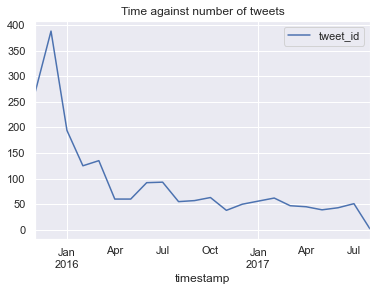

In [73]:
grouped_df.plot(x='timestamp', y= 'tweet_id',kind='line', title= 'Time against number of tweets');

This graph shows decreasing number of tweets which might imply a reduced frenzy in showing off and rating dogs on WeRateDogs.

## Ploting the dog breeds

In [74]:
dog_breed_group = df.groupby('dog_breed').count().reset_index()
dog_breed_group.sort_values(by=['tweet_id','dog_breed'], ascending=False, inplace=True)
dog_breed_group = dog_breed_group.reset_index()
dog_breed_group.drop('index',axis=1,inplace=True)
dog_breed_group

dog_breed  tweet_id  timestamp  source  text  expanded_urls  \
0                    None       298        298     298   298            289   
1        golden_retriever       153        153     153   153            148   
2      Labrador_retriever        93         93      93    93             93   
3               Chihuahua        80         80      80    80             78   
4                Pembroke        76         76      76    76             74   
..                    ...       ...        ...     ...   ...            ...   
107    Scottish_deerhound         1          1       1     1              1   
108        Scotch_terrier         1          1       1     1              1   
109      Japanese_spaniel         1          1       1     1              1   
110  Bouvier_des_Flandres         1          1       1     1              1   
111           Appenzeller         1          1       1     1              1   

     rating_numerator  rating_denominator  name  jpg_url  ...  p2_conf  \
0                 298                 298   298      298  ...      298   
1                 153                 153   153      153  ...      153   
2                  93                  93    93       93  ...       93   
3                  80                  80    80       80  ...       80   
4                  76                  76    76       76  ...       76   
..                ...                 ...   ...      ...  ...      ...   
107                 1                   1     1        1  ...        1   
108                 1                   1     1        1  ...        1   
109                 1                   1     1        1  ...        1   
110                 1                   1     1        1  ...        1   
111                 1                   1     1        1  ...        1   

     p2_dog   p3  p3_conf  p3_dog  url  retweet_count  favorite_count  type  \
0       298  298      298     298  298            298             298    51   
1       153  153      153     153  153            153             153    32   
2        93   93       93      93   93             93              93    18   
3        80   80       80      80   80             80              80    15   
4        76   76       76      76   76             76              76    11   
..      ...  ...      ...     ...  ...            ...             ...   ...   
107       1    1        1       1    1              1               1     0   
108       1    1        1       1    1              1               1     0   
109       1    1        1       1    1              1               1     0   
110       1    1        1       1    1              1               1     0   
111       1    1        1       1    1              1               1     0   

     ratings  
0        298  
1        153  
2         93  
3         80  
4         76  
..       ...  
107        1  
108        1  
109        1  
110        1  
111        1  

[112 rows x 25 columns]

In [75]:
dog_breed_group.iloc[:20]

dog_breed  tweet_id  timestamp  source  text  \
0                        None       298        298     298   298   
1            golden_retriever       153        153     153   153   
2          Labrador_retriever        93         93      93    93   
3                   Chihuahua        80         80      80    80   
4                    Pembroke        76         76      76    76   
5                         pug        59         59      59    59   
6                        chow        45         45      45    45   
7                  toy_poodle        43         43      43    43   
8                     Samoyed        41         41      41    41   
9                  Pomeranian        37         37      37    37   
10             cocker_spaniel        30         30      30    30   
11                   malamute        27         27      27    27   
12   Chesapeake_Bay_retriever        27         27      27    27   
13             French_bulldog        26         26      26    26   
14         miniature_pinscher        24         24      24    24   
15                   Cardigan        23         23      23    23   
16  Staffordshire_bullterrier        20         20      20    20   
17            German_shepherd        20         20      20    20   
18                     kuvasz        17         17      17    17   
19             Siberian_husky        17         17      17    17   

    expanded_urls  rating_numerator  rating_denominator  name  jpg_url  ...  \
0             289               298                 298   298      298  ...   
1             148               153                 153   153      153  ...   
2              93                93                  93    93       93  ...   
3              78                80                  80    80       80  ...   
4              74                76                  76    76       76  ...   
5              58                59                  59    59       59  ...   
6              41                45                  45    45       45  ...   
7              43                43                  43    43       43  ...   
8              41                41                  41    41       41  ...   
9              37                37                  37    37       37  ...   
10             29                30                  30    30       30  ...   
11             25                27                  27    27       27  ...   
12             26                27                  27    27       27  ...   
13             26                26                  26    26       26  ...   
14             24                24                  24    24       24  ...   
15             22                23                  23    23       23  ...   
16             20                20                  20    20       20  ...   
17             19                20                  20    20       20  ...   
18             17                17                  17    17       17  ...   
19             16                17                  17    17       17  ...   

    p2_conf  p2_dog   p3  p3_conf  p3_dog  url  retweet_count  favorite_count  \
0       298     298  298      298     298  298            298             298   
1       153     153  153      153     153  153            153             153   
2        93      93   93       93      93   93             93              93   
3        80      80   80       80      80   80             80              80   
4        76      76   76       76      76   76             76              76   
5        59      59   59       59      59   59             59              59   
6        45      45   45       45      45   45             45              45   
7        43      43   43       43      43   43             43              43   
8        41      41   41       41      41   41             41              41   
9        37      37   37       37      37   37             37              37   
10       30      30   30       30      3

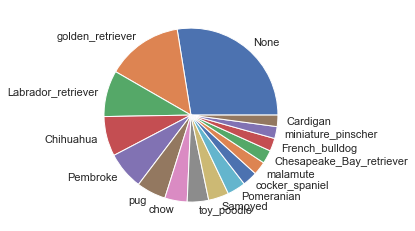

<Figure size 1080x1080 with 0 Axes>

In [76]:
plt.pie(dog_breed_group["tweet_id"].iloc[:16], labels=dog_breed_group["dog_breed"].iloc[:16])
plt.figure(figsize=(15,15))
plt.show()

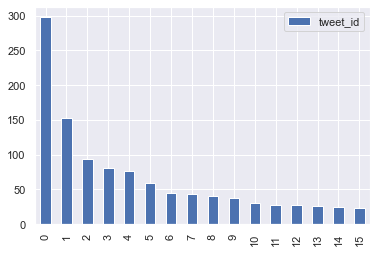

<Figure size 1080x1080 with 0 Axes>

In [77]:
dog_breed_group[["tweet_id","dog_breed"]].iloc[:16].plot(kind='bar')
# plt.xlabel(labels=dog_breed_group["dog_breed"].iloc[:15])
plt.figure(figsize=(15,15))
plt.show()

In [78]:
new_df = df.groupby('dog_breed').filter(lambda x: len(x)>21)
new_df

tweet_id           timestamp  \
4     891327558926688256 2017-07-29 16:00:24   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
10    890006608113172480 2017-07-26 00:31:25   
...                  ...                 ...   
1770  671134062904504320 2015-11-30 01:10:04   
1772  671115716440031232 2015-11-29 23:57:10   
1773  671109016219725825 2015-11-29 23:30:32   
1774  670995969505435648 2015-11-29 16:01:20   
1775  670842764863651840 2015-11-29 05:52:33   

                                                 source  \
4     <a href="http://twitter.com/download/iphone" r...   
6     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
8     <a href="http://twitter.com/download/iphone" r...   
10    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1770  <a href="http://twitter.com/download/iphone" r...   
1772  <a href="http://twitter.com/download/iphone" r...   
1773  <a href="http://twitter.com/download/iphone" r...   
1774  <a href="http://twitter.com/download/iphone" r...   
1775  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
4     This is Franklin. He would like you to stop ca...   
6     Meet Jax. He enjoys ice cream so much he gets ...   
7     When you watch your owner call another dog a g...   
8     This is Zoey. She doesn't want to be one of th...   
10    This is Koda. He is a South Australian decksha...   
...                                                 ...   
1770  Say hello to Clarence. He's a western Alkaline...   
1772  Meet Phred. He isn't steering, looking at the ...   
1773  This is Toby. He asked for chocolate cake for ...   
1774  Yea I can't handle this job anymore your dogs ...   
1775  After so many requests... here you go.\n\nGood...   

                                          expanded_urls  rating_numerator  \
4     https://twitter.com/dog_rates/status/891327558...              12.0   
6     https://gofundme.com/ydvmve-surgery-for-jax,ht...              13.0   
7     https://twitter.com/dog_rates/status/890729181...              13.0   
8     https://twitter.com/dog_rates/status/890609185...              13.0   
10    https://twitter.com/dog_rates/status/890006608...              13.0   
...                                                 ...               ...   
1770  https://twitter.com/dog_rates/status/671134062...               8.0   
1772  https://twitter.com/dog_rates/status/671115716...               6.0   
1773  https://twitter.com/dog_rates/status/671109016...               8.0   
1774  https://twitter.com/dog_rates/status/670995969...              12.0   
1775  https://twitter.com/dog_rates/status/670842764...             420.0   

      rating_denominator      name  \
4                     10  Franklin   
6                     10       Jax   
7                     10      None   
8                     10      Zoey   
10                    10      Koda   
...                  ...       ...   
1770                  10  Clarence   
1772                  10     Phred   
1773                  10      Toby   
1774                  10      None   
1775                  10      None   

                                              jpg_url  img_num  ... p2_dog  \
4     https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      1.0  ...   True   
6     https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg      1.0  ...  False   
7     https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg      1.0  ...   True   
8     https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg      1.0  ...  False   
10    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg      1.0  ...   True   
...                                               ...      ...  ...    ...   
1770  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg      1.0  ...   True   
1772  https://p

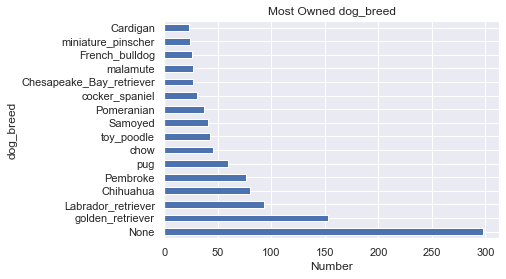

In [79]:
new_df['dog_breed'].value_counts().plot(kind = 'barh',title='Most Owned dog_breed')
plt.xlabel('Number')
plt.ylabel('dog_breed');

In [80]:
## Plotting the dog types

In [81]:
df['type'] = df['type'].fillna('None')

In [82]:
dog_type_group = df.groupby('type').count().reset_index()
dog_type_group.sort_values(by=['tweet_id','type'], ascending=False, inplace=True)
dog_type_group = dog_type_group.reset_index()
dog_type_group.drop('index',axis=1,inplace=True)
dog_type_group

type  tweet_id  timestamp  source  text  expanded_urls  \
0     None      1678       1678    1678  1678           1634   
1   pupper       238        238     238   238            236   
2    doggo        76         76      76    76             74   
3    puppo        28         28      28    28             26   
4  floofer         3          3       3     3              3   

   rating_numerator  rating_denominator  name  jpg_url  ...  p2_conf  p2_dog  \
0              1678                1678  1678     1432  ...     1432    1432   
1               238                 238   238      237  ...      237     237   
2                76                  76    76       76  ...       76      76   
3                28                  28    28       28  ...       28      28   
4                 3                   3     3        3  ...        3       3   

     p3  p3_conf  p3_dog   url  retweet_count  favorite_count  dog_breed  \
0  1432     1432    1432  1678           1678            1678       1432   
1   237      237     237   238            238             238        237   
2    76       76      76    76             76              76         76   
3    28       28      28    28             28              28         28   
4     3        3       3     3              3               3          3   

   ratings  
0     1678  
1      238  
2       76  
3       28  
4        3  

[5 rows x 25 columns]

In [83]:
dog_type_group.iloc[:20]

type  tweet_id  timestamp  source  text  expanded_urls  \
0     None      1678       1678    1678  1678           1634   
1   pupper       238        238     238   238            236   
2    doggo        76         76      76    76             74   
3    puppo        28         28      28    28             26   
4  floofer         3          3       3     3              3   

   rating_numerator  rating_denominator  name  jpg_url  ...  p2_conf  p2_dog  \
0              1678                1678  1678     1432  ...     1432    1432   
1               238                 238   238      237  ...      237     237   
2                76                  76    76       76  ...       76      76   
3                28                  28    28       28  ...       28      28   
4                 3                   3     3        3  ...        3       3   

     p3  p3_conf  p3_dog   url  retweet_count  favorite_count  dog_breed  \
0  1432     1432    1432  1678           1678            1678       1432   
1   237      237     237   238            238             238        237   
2    76       76      76    76             76              76         76   
3    28       28      28    28             28              28         28   
4     3        3       3     3              3               3          3   

   ratings  
0     1678  
1      238  
2       76  
3       28  
4        3  

[5 rows x 25 columns]

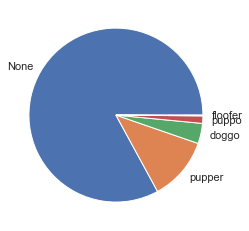

<Figure size 1080x1080 with 0 Axes>

In [84]:
plt.pie(dog_type_group["tweet_id"].iloc[:16], labels=dog_type_group["type"].iloc[:16])
plt.figure(figsize=(15,15))
plt.show()

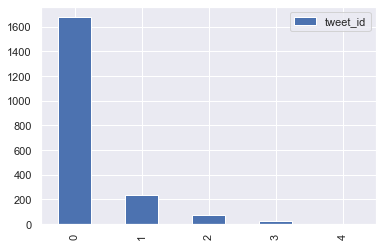

<Figure size 1080x1080 with 0 Axes>

In [85]:
dog_type_group[["tweet_id","type"]].iloc[:16].plot(kind='bar')
# plt.xlabel(labels=dog_breed_group["dog_breed"].iloc[:15])
plt.figure(figsize=(15,15))
plt.show()

In [86]:
new_df = df.groupby('type').filter(lambda x: len(x)>21)
new_df

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
...                  ...                 ...   
2018  666435652385423360 2015-11-17 02:00:15   
2019  666430724426358785 2015-11-17 01:40:41   
2020  666428276349472768 2015-11-17 01:30:57   
2021  666421158376562688 2015-11-17 01:02:40   
2022  666418789513326592 2015-11-17 00:53:15   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2018  <a href="http://twitter.com/download/iphone" r...   
2019  <a href="http://twitter.com/download/iphone" r...   
2020  <a href="http://twitter.com/download/iphone" r...   
2021  <a href="http://twitter.com/download/iphone" r...   
2022  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2018  "Can you behave? You're ruining my wedding day...   
2019  Oh boy what a pup! Sunglasses take this one to...   
2020  Here we have an Austrian Pulitzer. Collectors ...   
2021  *internally screaming* 12/10 https://t.co/YMcr...   
2022  This is Walter. He is an Alaskan Terrapin. Lov...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...              13.0   
1     https://twitter.com/dog_rates/status/892177421...              13.0   
2     https://twitter.com/dog_rates/status/891815181...              12.0   
3     https://twitter.com/dog_rates/status/891689557...              13.0   
4     https://twitter.com/dog_rates/status/891327558...              12.0   
...                                                 ...               ...   
2018  https://twitter.com/dog_rates/status/666435652...              10.0   
2019  https://twitter.com/dog_rates/status/666430724...               6.0   
2020  https://twitter.com/dog_rates/status/666428276...               7.0   
2021  https://twitter.com/dog_rates/status/666421158...              12.0   
2022  https://twitter.com/dog_rates/status/666418789...              10.0   

      rating_denominator      name  \
0                     10   Phineas   
1                     10     Tilly   
2                     10    Archie   
3                     10     Darla   
4                     10  Franklin   
...                  ...       ...   
2018                  10      None   
2019                  10      None   
2020                  10      None   
2021                  10      None   
2022                  10    Walter   

                                              jpg_url  img_num  ... p2_dog  \
0     https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg      1.0  ...   True   
1     https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg      1.0  ...   True   
2     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg      1.0  ...   True   
3     https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg      1.0  ...   True   
4     https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      1.0  ...   True   
...                                               ...      ...  ...    ...   
2018                                              NaN      NaN  ...    NaN   
2019           

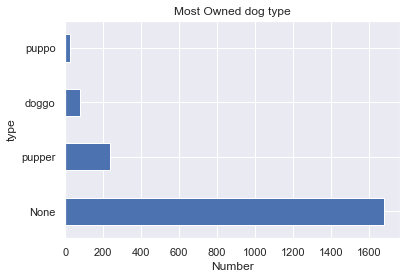

In [87]:
new_df['type'].value_counts().plot(kind = 'barh',title='Most Owned dog type')
plt.xlabel('Number')
plt.ylabel('type');

The most rated dog_breed is the Golden retriever followed by the Labrador_retreiver

## Dog_breeds with high ratings, favourite and retweet counts

In [88]:
ratings = df.groupby(['ratings','dog_breed']).count().reset_index()
ratings

ratings          dog_breed  tweet_id  timestamp  source  text  \
0        0.0               None         1          1       1     1   
1        0.1               None         2          2       2     2   
2        0.1               chow         1          1       1     1   
3        0.1   golden_retriever         1          1       1     1   
4        0.2          Chihuahua         1          1       1     1   
..       ...                ...       ...        ...     ...   ...   
516     42.0  Brabancon_griffon         1          1       1     1   
517     42.0               None         1          1       1     1   
518     66.6           Airedale         1          1       1     1   
519    177.6   Blenheim_spaniel         1          1       1     1   
520      inf      Gordon_setter         1          1       1     1   

     expanded_urls  rating_numerator  rating_denominator  name  ...  p2  \
0                1                 1                   1     1  ...   1   
1                1                 2                   2     2  ...   2   
2                0                 1                   1     1  ...   1   
3                0                 1                   1     1  ...   1   
4                1                 1                   1     1  ...   1   
..             ...               ...                 ...   ...  ...  ..   
516              0                 1                   1     1  ...   1   
517              1                 1                   1     1  ...   1   
518              0                 1                   1     1  ...   1   
519              1                 1                   1     1  ...   1   
520              0                 1                   1     1  ...   1   

     p2_conf  p2_dog  p3  p3_conf  p3_dog  url  retweet_count  favorite_count  \
0          1       1   1        1       1    1              1               1   
1          2       2   2        2       2    2              2               2   
2          1       1   1        1       1    1              1               1   
3          1       1   1        1       1    1              1               1   
4          1       1   1        1       1    1              1               1   
..       ...     ...  ..      ...     ...  ...            ...             ...   
516        1       1   1        1       1    1              1               1   
517        1       1   1        1       1    1              1               1   
518        1       1   1        1       1    1              1               1   
519        1       1   1        1       1    1              1               1   
520        1       1   1        1       1    1              1               1   

     type  
0       1  
1       2  
2       1  
3       1  
4       1  
..    ...  
516     1  
517     1  
518     1  
519     1  
520     1  

[521 rows x 25 columns]

In [89]:
mean_ratings = df.groupby(['dog_breed']).mean().reset_index()
mean_ratings = mean_ratings.sort_values('ratings', ascending=False)
mean_ratings = mean_ratings.reset_index()
mean_ratings.drop('index', axis=1, inplace=True)

In [90]:
mean_ratings

dog_breed  rating_numerator  rating_denominator   img_num  \
0              Gordon_setter        248.500000                 7.5  1.250000   
1           Blenheim_spaniel        186.300000                10.0  1.400000   
2          Brabancon_griffon        147.333333                10.0  1.333333   
3                   Airedale         92.500000                10.0  1.250000   
4    black-and-tan_coonhound         13.000000                10.0  2.500000   
..                       ...               ...                 ...       ...   
107       Bedlington_terrier          9.000000                10.0  1.000000   
108      Rhodesian_ridgeback          8.500000                10.0  1.000000   
109            silky_terrier          8.000000                10.0  2.000000   
110          Norwich_terrier          8.000000                10.0  1.000000   
111                  clumber          4.000000                10.0  1.000000   

      p1_conf   p2_conf   p3_conf  retweet_count  favorite_count    ratings  
0    0.538549  0.177851  0.100459    2783.250000    12554.000000        inf  
1    0.644205  0.105714  0.054503    1373.200000     5726.100000  18.630000  
2    0.369981  0.247691  0.102877   10491.666667    25133.333333  14.733333  
3    0.596238  0.128774  0.075348    2374.125000     9601.125000   9.250000  
4    0.692000  0.147506  0.097786    1452.000000     9820.000000   1.300000  
..        ...       ...       ...            ...             ...        ...  
107  0.438401  0.140861  0.091291    2588.833333     5930.500000   0.900000  
108  0.503644  0.183390  0.118749    4002.000000    14592.250000   0.850000  
109  0.324251  0.181210  0.133436     255.000000     1397.000000   0.800000  
110  0.351724  0.195269  0.093822     928.333333     2647.666667   0.800000  
111  0.946718  0.015950  0.006519     703.000000     2521.000000   0.400000  

[112 rows x 10 columns]

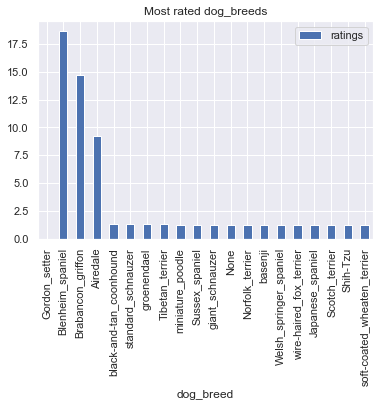

In [91]:
mean_ratings.iloc[:20].plot(x='dog_breed',y='ratings', kind='bar',title='Most rated dog_breeds');

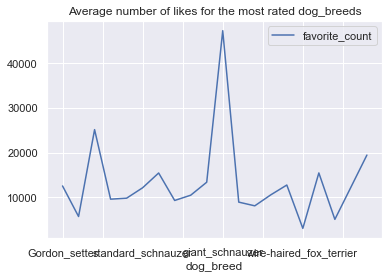

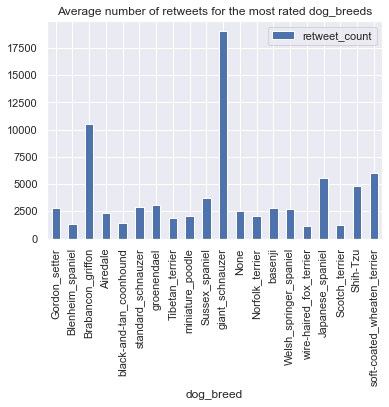

In [92]:
mean_ratings.iloc[:20].plot(x='dog_breed',y='favorite_count', kind='line',title='Average number of likes for the most rated dog_breeds');
mean_ratings.iloc[:20].plot(x='dog_breed',y='retweet_count', kind='bar',title='Average number of retweets for the most rated dog_breeds');

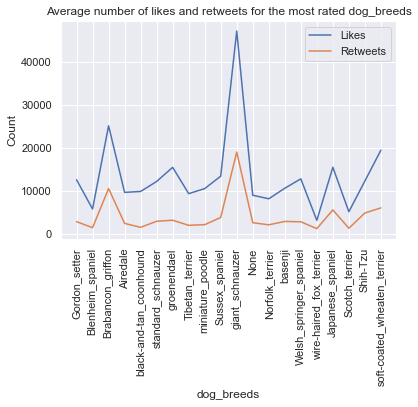

In [93]:
plt.plot(mean_ratings.iloc[:20]['dog_breed'], mean_ratings.iloc[:20]['favorite_count'],label='Likes');
plt.plot(mean_ratings.iloc[:20]['dog_breed'], mean_ratings.iloc[:20]['retweet_count'],label='Retweets');
plt.title('Average number of likes and retweets for the most rated dog_breeds');
plt.xticks(mean_ratings.iloc[:20]['dog_breed'], rotation=90)
plt.legend();
plt.xlabel('dog_breeds');
plt.ylabel('Count');

The above shows the most owned dog breed is not the most rated or liked or even retweeted

## Dog types with high ratings, favourite and retweet counts

In [94]:
mean_ratings = df.groupby(['type']).mean().reset_index()
mean_ratings = mean_ratings.sort_values('ratings', ascending=False)
mean_ratings = mean_ratings.reset_index()
mean_ratings.drop('index', axis=1, inplace=True)

In [95]:
mean_ratings

type  rating_numerator  rating_denominator   img_num   p1_conf  \
0     None         13.309309           10.259237  1.226955  0.605828   
1  floofer         12.333333           10.000000  1.000000  0.398234   
2    puppo         12.071429           10.000000  1.035714  0.561690   
3    doggo         14.210526           12.105263  1.118421  0.612673   
4   pupper         12.837227           12.016807  1.257384  0.595972   

    p2_conf   p3_conf  retweet_count  favorite_count   ratings  
0  0.133990  0.059504    2161.463051     7171.439213       inf  
1  0.203577  0.080583    4234.666667    16270.666667  1.233333  
2  0.132766  0.065897    4443.785714    16387.500000  1.207143  
3  0.116862  0.058321    3714.368421    12900.210526  1.168421  
4  0.135185  0.060628    1561.147059     4993.550420  1.063134

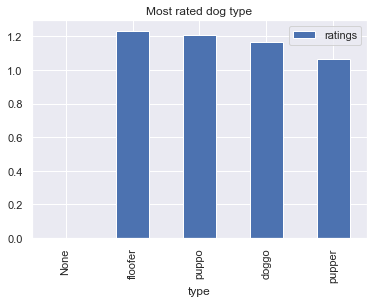

In [96]:
mean_ratings.plot(x='type',y='ratings', kind='bar',title='Most rated dog type');

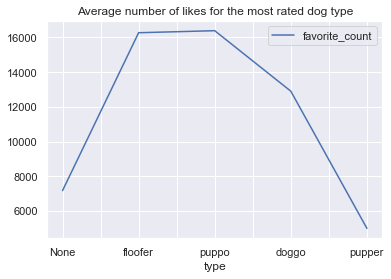

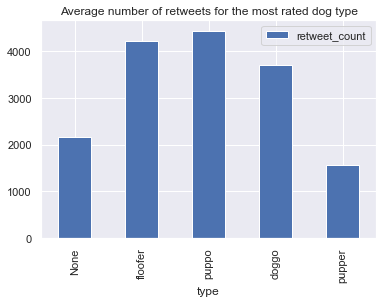

In [97]:
mean_ratings.plot(x='type',y='favorite_count', kind='line',title='Average number of likes for the most rated dog type');
mean_ratings.plot(x='type',y='retweet_count', kind='bar',title='Average number of retweets for the most rated dog type');

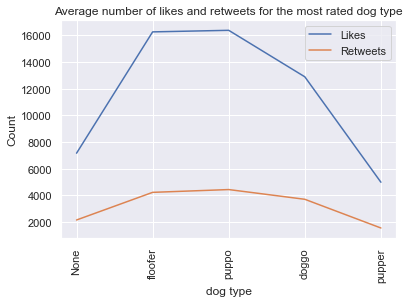

In [98]:
plt.plot(mean_ratings['type'], mean_ratings['favorite_count'],label='Likes');
plt.plot(mean_ratings['type'], mean_ratings['retweet_count'],label='Retweets');
plt.title('Average number of likes and retweets for the most rated dog type');
plt.xticks(mean_ratings['type'], rotation=90)
plt.legend();
plt.xlabel('dog type');
plt.ylabel('Count');

Text(0.5, 1.0, 'Average number of likes for each dog type')

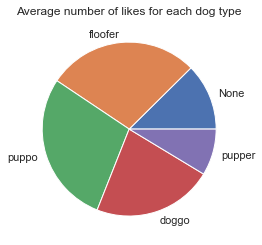

In [99]:
plt.pie(mean_ratings['favorite_count'], labels=mean_ratings['type']);
plt.title('Average number of likes for each dog type')

Text(0.5, 1.0, 'Average number of retweet for each dog type')

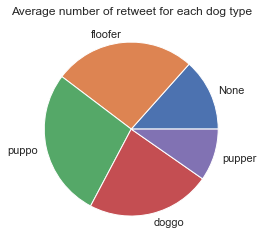

In [100]:
plt.pie(mean_ratings['retweet_count'], labels=mean_ratings['type']);
plt.title('Average number of retweet for each dog type')

The above visualizations also shows the most rated dog types